In [2]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
train_goods = pd.concat([
    pd.read_csv('./训练集/traindata_goodsid/part-00000', header=None, names=['goods_id', 'cat_id', 'brandsn']),
    pd.read_csv('./训练集/traindata_goodsid/part-00001', header=None, names=['goods_id', 'cat_id', 'brandsn']),
    pd.read_csv('./训练集/traindata_goodsid/part-00002', header=None, names=['goods_id', 'cat_id', 'brandsn'])
], axis=0)

train_user = pd.concat([
    pd.read_csv(x, header=None, names=['user_id', 'goods_id', 'is_clk', 'is_like', 'is_addcart', 'is_order', 'expose_start_time', 'dt'], nrows=500000)
    for x in glob.glob('./训练集/traindata_user/part*')
], axis=0)

In [4]:
testa_goods = pd.concat([
    pd.read_csv('./测试集a/predict_goods_id/part-00000', header=None, names=['goods_id', 'cat_id', 'brandsn']),
    pd.read_csv('./测试集a/predict_goods_id/part-00001', header=None, names=['goods_id', 'cat_id', 'brandsn']),
], axis=0)

testa_user = pd.read_excel('./测试集a/a榜需要预测的uid_5000.xlsx')

In [5]:
#对训练集中的用户ID和商品ID进行标签编码
user_encode = LabelEncoder()
user_encode.fit(list(train_user['user_id']) + list(train_user['user_id']))

goods_encode = LabelEncoder()
goods_encode.fit(list(train_user['goods_id']) + list(train_goods['goods_id']) + list(train_goods['goods_id']))

LabelEncoder()

In [6]:
#计算测试集用户数据中的用户ID和商品ID在训练集用户数据中出现的比例
np.mean(testa_user['user_id'].isin(train_user['user_id'])), np.mean(testa_goods['goods_id'].isin(train_goods['goods_id']))

(1.0, 0.9999751455447659)

In [7]:
#去重
train_user['user_id'].nunique(), train_user['goods_id'].nunique()

(51603, 1531577)

In [8]:
#计算训练集用户数据的描述统计信息，并将结果保留两位小数
train_user.describe().round(2)

,is_clk,is_like,is_addcart,is_order,dt
count,7791816.00,7791816.00,7791816.00,7791816.00,7791816.00
mean,1.06,0.02,0.06,0.01,20230222.85
std,0.28,0.13,0.27,0.09,26.21
min,1.00,0.00,0.00,0.00,20230203.00
25%,1.00,0.00,0.00,0.00,20230209.00
50%,1.00,0.00,0.00,0.00,20230216.00
75%,1.00,0.00,0.00,0.00,20230224.00
max,121.00,22.00,28.00,15.00,20230303.00


In [9]:
#将训练集中的用户数据和商品数据根据商品ID进行合并
train_data = pd.merge(train_user.iloc[:], train_goods.iloc[:], on='goods_id')

In [10]:
#获取合并后的数据集中商品类别和品牌的数量
train_data['cat_id'].nunique(), train_data['brandsn'].nunique()
print(train_data)

                                  user_id                          goods_id  \
0        8da2ec07d8bf9bfe1e849cb7e7f25e5c  f6e4f43d18157cbdcdc653c6e35f01fb   
1        62a800cd3e6884078ac86af31926ca6e  f6e4f43d18157cbdcdc653c6e35f01fb   
2        dfea38a0a8c81429316857cbcede23c6  f6e4f43d18157cbdcdc653c6e35f01fb   
3        dfea38a0a8c81429316857cbcede23c6  f6e4f43d18157cbdcdc653c6e35f01fb   
4        328395043a7cf38a36590a8df12b3b03  f6e4f43d18157cbdcdc653c6e35f01fb   
...                                   ...                               ...   
7791759  9b9c0493e6ee675c32b6c2add2b57cd9  49cb5e43cc1dc19cb5f5241cf06816a5   
7791760  2591ff4a1af75a2dc9e020cdafc5ab05  7fb4a90d3aa54ce13355c8ad9043e2e1   
7791761  18917649fd13d3a5fc37443c248d572e  a7e398eff0f997168bf341235ea4817d   
7791762  a4b0bc37d9cceed3bedc794e8d632d38  d6f2d674b397f89a55ecf34f127d0ad3   
7791763  333cb2e2e4c37293ca79f985a66d72f4  2acf9dbcd66278505f54da19d636825c   

         is_clk  is_like  is_addcart  is_order    e

In [11]:
train_user.sort_values(by='dt', ascending=True, inplace=True)
train_user

,user_id,goods_id,is_clk,is_like,is_addcart,is_order,expose_start_time,dt
0,8da2ec07d8bf9bfe1e849cb7e7f25e5c,f6e4f43d18157cbdcdc653c6e35f01fb,1,0,0,0,2023-02-03 17:11:07,20230203
162255,598b1b15ffcff6ee21a26c6b3859c06b,68d505f4cb0700f7c58678079aeadf09,1,0,0,0,2023-02-03 18:56:16,20230203
162254,cbe0865d058bcbb0b282d2602d409f4e,335f02d7dbaf6e956f235a6c2872ad75,1,0,0,0,2023-02-03 21:59:35,20230203
162253,b56e7497c45890dc3b53c44e140032b9,dce65cc5551a5dc1bc6f4f8828b3ade3,1,0,0,0,2023-02-03 07:51:54,20230203
162252,b56e7497c45890dc3b53c44e140032b9,481f04f79afa19649d3b6ea41c7e3c39,1,0,0,0,2023-02-03 07:51:28,20230203
...,...,...,...,...,...,...,...,...
76574,89e6b71a16099c449b377538c039e882,d38e7b53f3757005042220b61c626a49,1,0,0,0,2023-03-03 22:40:33,20230303
76575,2adbbf3f6d03f7810803c2333aca700e,8f803790cf44165ba95cf8107468bc12,2,0,1,0,2023-03-03 16:15:27,20230303
76576,2adbbf3f6d03f7810803c2333aca700e,ef7ca24e7353d815ce2ffbd5ef8dc969,1,0,0,0,2023-03-03 16:15:27,20230303
76718,f24ebe72a5be14cf2305cc2d39fb6f53,a2e7ed4f8bd892f8ffdede8f3bb00262,1,0,0,0,2023-03-03 21:39:44,20230303


In [12]:
daily_train_purchases = train_user.groupby('dt')['is_order'].sum()
daily_train_purchases

dt
20230203    3984
20230204    1968
20230205    1843
20230206    1990
20230207    2364
20230208    2282
20230209    1732
20230210    2074
20230211    2175
20230212    2137
20230213    1887
20230214    1631
20230215    1653
20230216    1926
20230217    1818
20230218    2125
20230219    2065
20230220    1891
20230221    1852
20230222    1966
20230223    1671
20230224    1850
20230225    1968
20230226    1838
20230227    1707
20230228    1865
20230301    1870
20230302    1711
20230303    1754
Name: is_order, dtype: int64

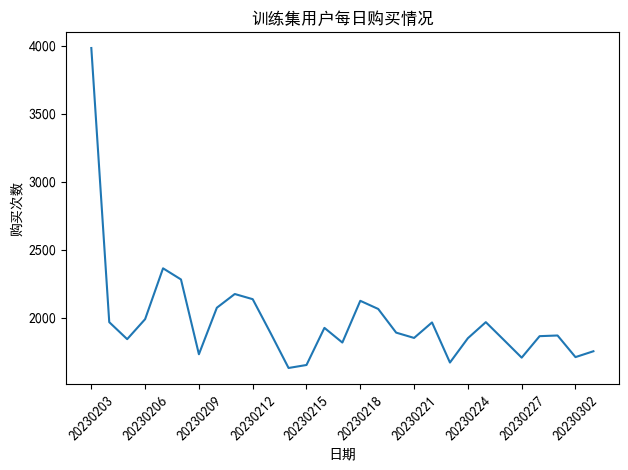

In [13]:
plt.rcParams['font.family'] = 'SimHei'
daily_train_purchases.index = daily_train_purchases.index.astype(str)
plt.plot(daily_train_purchases.index, daily_train_purchases.values)
plt.title('训练集用户每日购买情况')
plt.xlabel('日期')
plt.ylabel('购买次数')
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局，防止标签重叠
plt.xticks(np.arange(0, 29, step=3))
plt.show()

In [14]:
merged_user = pd.merge(testa_user, train_user, on='user_id', how='inner')

In [15]:
np.mean(merged_user['user_id'].isin(testa_user['user_id']))

1.0

In [16]:
merged_user

,user_id,goods_id,is_clk,is_like,is_addcart,is_order,expose_start_time,dt
0,db55512e13c666a67dbfeae200bbb77e,fb27d988f75c24ad88b80320ed55c7ef,1,0,0,0,2023-02-06 21:44:56,20230206
1,db55512e13c666a67dbfeae200bbb77e,6a1b3d94ad2271f301915656be046149,1,0,0,0,2023-02-06 21:44:37,20230206
2,db55512e13c666a67dbfeae200bbb77e,2cd0989a9c778a50169f4e835c3b8ad2,1,0,0,0,2023-02-06 21:44:11,20230206
3,db55512e13c666a67dbfeae200bbb77e,10f1aa0b2ab262cb3e22c9f979dfcc38,1,0,0,0,2023-02-06 21:44:28,20230206
4,db55512e13c666a67dbfeae200bbb77e,6ed0b6b2761b749f52e708c66dc4755c,1,0,0,0,2023-02-08 01:22:30,20230208
...,...,...,...,...,...,...,...,...
1365137,858f5f014accf487742bb0e973282d91,63858940f6aab15e9af7e1c92cc0c7c2,1,0,0,0,2023-03-03 16:44:21,20230303
1365138,858f5f014accf487742bb0e973282d91,327af1cc229e0d98e6144b140491b134,1,0,0,0,2023-03-03 16:44:10,20230303
1365139,858f5f014accf487742bb0e973282d91,4ad00a525ec640cb938210c6c9dfb18d,1,0,0,0,2023-03-03 16:44:10,20230303
1365140,858f5f014accf487742bb0e973282d91,a78e14144593ce92cfdc6d302f403223,2,0,0,0,2023-03-03 16:46:35,20230303


In [17]:
daily_test_purchases = merged_user.groupby('dt')['is_order'].sum()
daily_test_purchases

dt
20230203    375
20230204    272
20230205    307
20230206    305
20230207    379
20230208    359
20230209    306
20230210    319
20230211    339
20230212    317
20230213    275
20230214    285
20230215    251
20230216    342
20230217    321
20230218    366
20230219    329
20230220    277
20230221    293
20230222    331
20230223    270
20230224    297
20230225    299
20230226    328
20230227    333
20230228    322
20230301    356
20230302    307
20230303    333
Name: is_order, dtype: int64

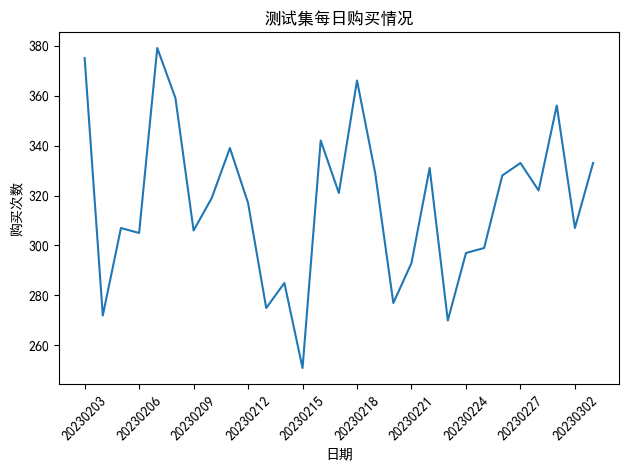

In [18]:
plt.rcParams['font.family'] = 'SimHei'
daily_test_purchases.index = daily_test_purchases.index.astype(str)
plt.plot(daily_test_purchases.index, daily_test_purchases.values)
plt.title('测试集每日购买情况')
plt.xlabel('日期')
plt.ylabel('购买次数')
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局，防止标签重叠
plt.xticks(np.arange(0, 29, step=3))
plt.show()

In [24]:
merged_goods = pd.merge(testa_goods, train_user, on='goods_id', how='inner')
goods_top10 = merged_goods.groupby('goods_id')['is_order'].sum().sort_values(ascending=False)
goods_top10

goods_id
ca24144a1c572fe3eba9793d5b128d59    33
a38042e5e0e2ac870b00f18dd605d325    19
52b42feb044e27cdf8f6b209b6be863b    18
64e8e2ba7432b6320b9937af45927641    15
0bb81d6a7e15b8f9b99252a2de6fdbe5    13
                                    ..
573a5ce96f668a0e7f4d0d51c7c5a6ad     0
573a758850293dcf9557f3f8097c05b3     0
573a7c4a7c7559ad9ee572406d4da11f     0
573aa31598e09ef45e019ed2a36181f2     0
ffffff57a7cad7becd372c6aad18612a     0
Name: is_order, Length: 911153, dtype: int64

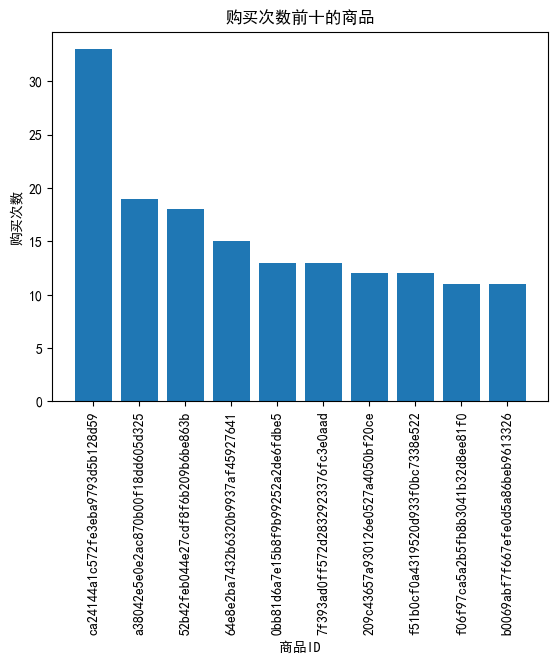

In [25]:
top_10_goods = goods_top10.head(10)
plt.bar(top_10_goods.index, top_10_goods.values)
plt.xlabel('商品ID')
plt.ylabel('购买次数')
plt.title('购买次数前十的商品')
plt.xticks(rotation=90)  # 如果商品ID较长，可以旋转x轴刻度标签
plt.show()


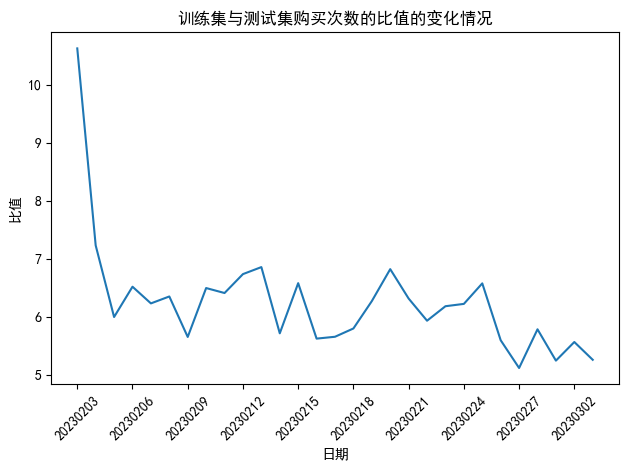

In [27]:
plt.rcParams['font.family'] = 'SimHei'
daily_test_purchases.index = daily_test_purchases.index.astype(str)
plt.plot(daily_test_purchases.index, daily_train_purchases.values/daily_test_purchases.values)
plt.title('训练集与测试集购买次数的比值的变化情况')
plt.xlabel('日期')
plt.ylabel('比值')
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局，防止标签重叠
plt.xticks(np.arange(0, 29, step=3))
plt.show()